In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
len(train_labels)

8982

In [3]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [4]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results  = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [6]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)


In [7]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics = ['accuracy'])

In [9]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [10]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 3s 339us/step - loss: 2.6034 - acc: 0.5411 - val_loss: 1.7132 - val_acc: 0.6470
Epoch 2/9
7982/7982 [==============================] - 2s 264us/step - loss: 1.4284 - acc: 0.6948 - val_loss: 1.2993 - val_acc: 0.7150
Epoch 3/9
7982/7982 [==============================] - 2s 250us/step - loss: 1.0626 - acc: 0.7702 - val_loss: 1.1231 - val_acc: 0.7510
Epoch 4/9
7982/7982 [==============================] - 2s 252us/step - loss: 0.8359 - acc: 0.8208 - val_loss: 1.0252 - val_acc: 0.7780
Epoch 5/9
7982/7982 [==============================] - 2s 250us/step - loss: 0.6653 - acc: 0.8564 - val_loss: 0.9394 - val_acc: 0.8040
Epoch 6/9
7982/7982 [==============================] - 2s 251us/step - loss: 0.5295 - acc: 0.8882 - val_loss: 0.9235 - val_acc: 0.8050
Epoch 7/9
7982/7982 [==============================] - 2s 249us/step - loss: 0.4272 - acc: 0.9

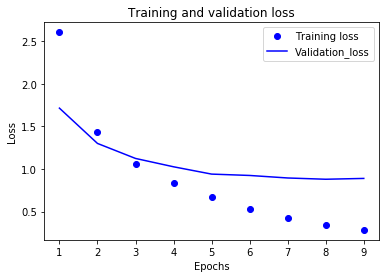

In [13]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(val_loss)+1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation_loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

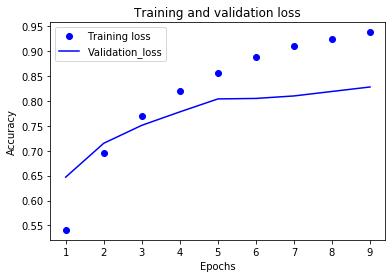

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training loss')
plt.plot(epochs, val_acc, 'b', label='Validation_loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 1s 282us/step


In [16]:
results

[0.9630034916759705, 0.7902938557966204]

In [19]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array))/len(test_labels)

0.17586821015138024

In [20]:
predictions = model.predict(x_test)

In [21]:
predictions[0].shape

(46,)

In [22]:
np.sum(predictions[0])

1.0000001

In [23]:
np.argmax(predictions[0])

3